## HR Employee Attrition Analysis

#### Required Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

#### Load Data Set

In [2]:
Hr = pd.read_csv(r"C:\Users\dell\Downloads\HR-Employee-Attrition.csv")

In [3]:
# Read top 5 rows
Hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Cleaning & Preparation

In [4]:
Hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# check duplicates
Hr.duplicated().sum()

np.int64(0)

In [6]:
# Check mising value
Hr.isnull().sum().sum()

np.int64(0)

In [7]:
for col in Hr.columns:
    print(Hr[col].unique())
    print("--"*50)

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
----------------------------------------------------------------------------------------------------
['Yes' 'No']
----------------------------------------------------------------------------------------------------
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------------------------------------------------------------------
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  48

#### Exploratory Data Analysis And Visualization

In [66]:
sns.set_theme(style='dark')

In [9]:
Hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [64]:
Hr.describe(include="object").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


**Age Distribution**

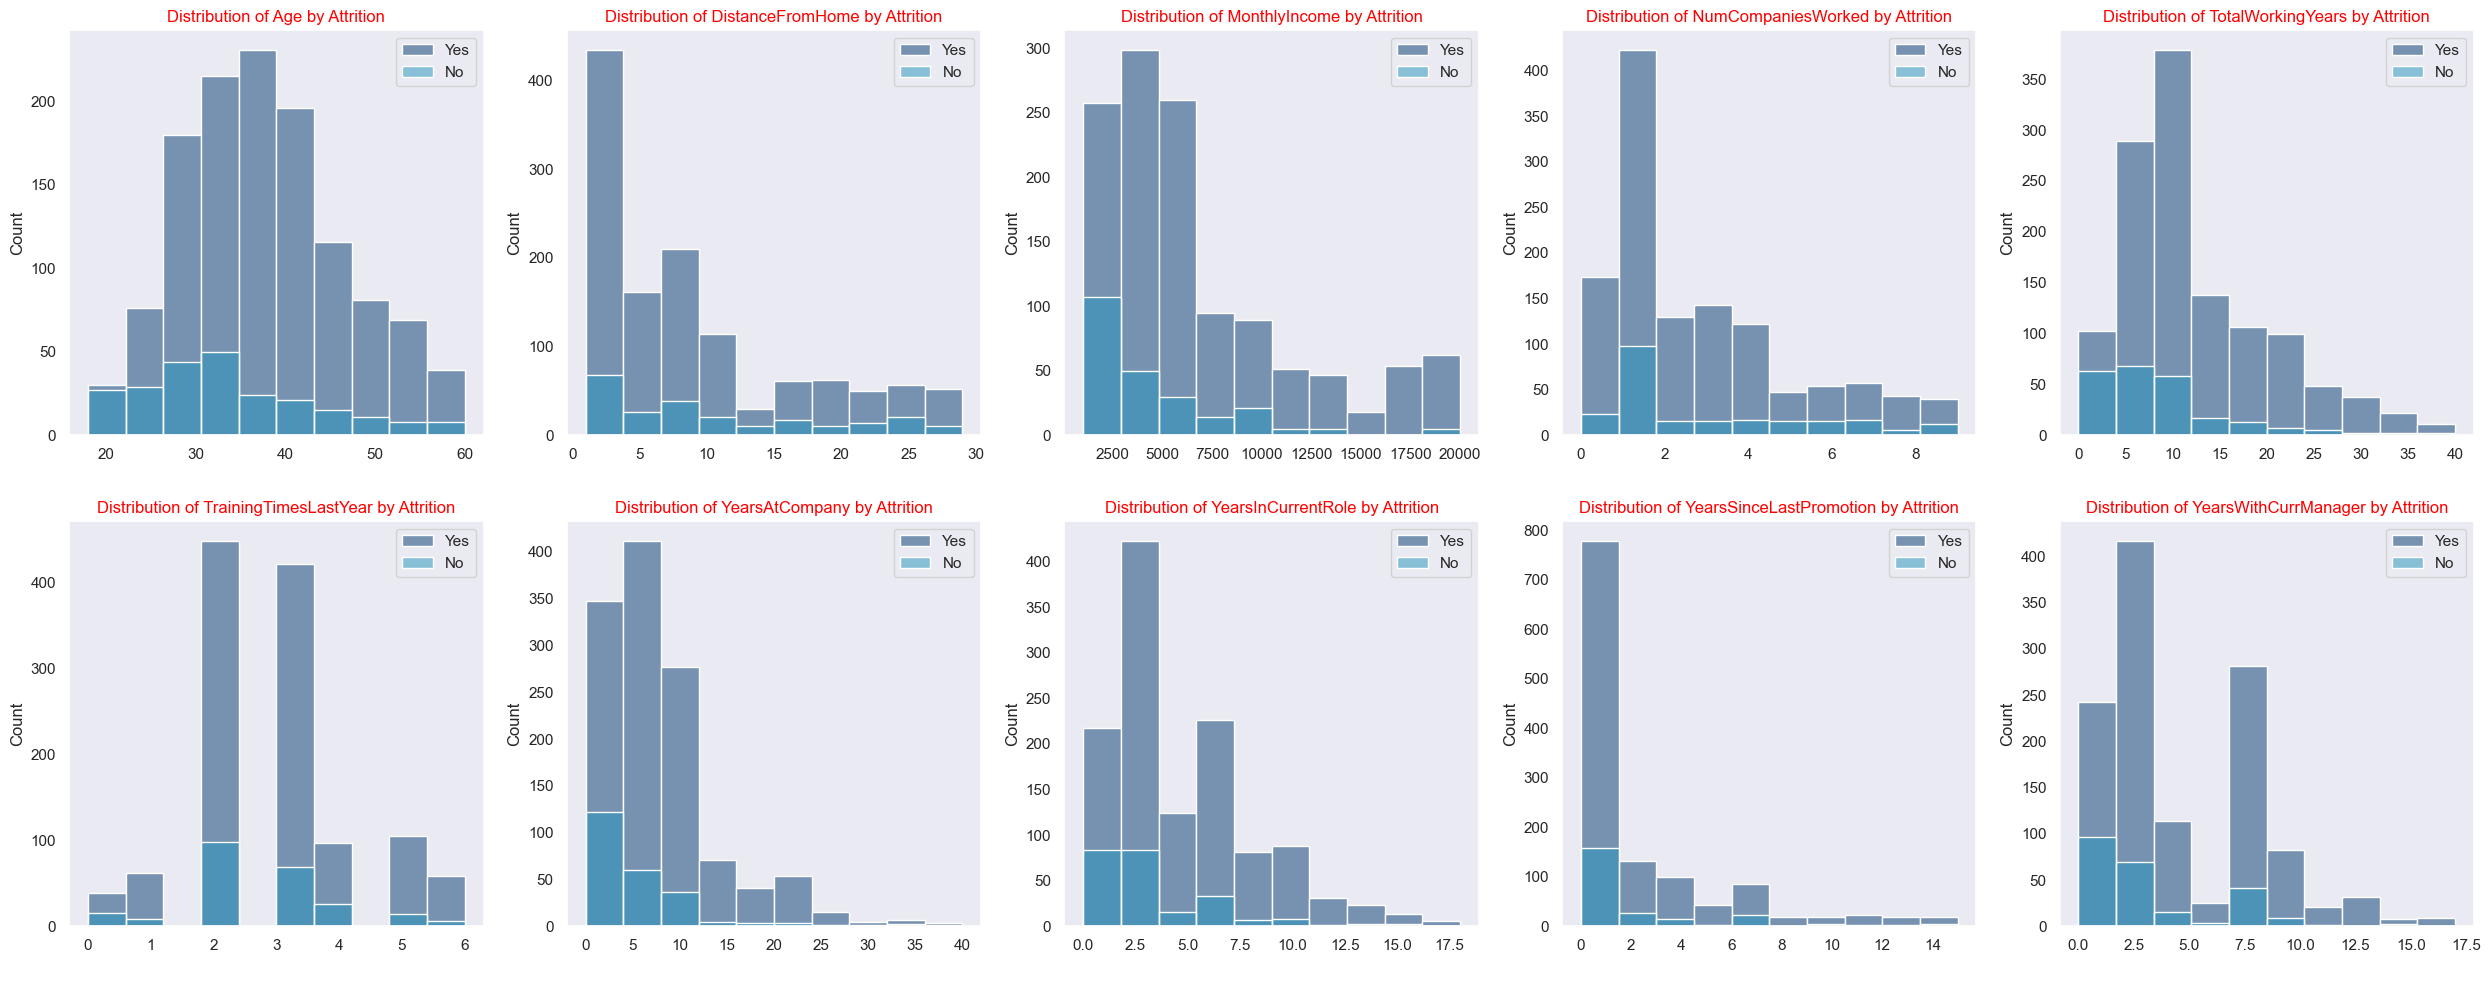

In [67]:
Num_Column = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
plt.figure(figsize=(25,10))
for x, col in enumerate(Num_Column):
    plt.subplot(2,5,x+1)
    sns.histplot(x = col, data= Hr, 
    hue= "Attrition",palette=["#2596be","#063970"],bins=10)
    plt.title(f"Distribution of {col} by Attrition",color = "Red")
    plt.xlabel(" ")
    plt.legend(Hr["Attrition"])
plt.tight_layout()
plt.show()    
    

## Insights
- **1️ Age**
Employee attrition is higher among younger employees (approximately 25–35 years). As age increases, attrition steadily declines, indicating that mid-career and senior employees are more stable and less likely to leave.

- **2️ Distance From Home**
Employees living farther from the workplace show higher attrition compared to those living closer. This suggests that long commute distance contributes to employee dissatisfaction and turnover.

- **3️ Monthly Income**
Attrition is concentrated in the lower income ranges, while employees earning higher salaries demonstrate stronger retention. This indicates that compensation plays a significant role in employee attrition.

- **4️ Number of Companies Worked**
Employees who have worked at multiple companies in the past are more likely to leave again. This pattern reflects repeated job-hopping behavior.

- **5️ Total Working Years**
Attrition is higher among employees with lower overall work experience, whereas highly experienced employees tend to remain with the organization longer, showing greater career stability.

- **6️ Training Times Last Year**
No clear linear relationship is observed between training frequency and attrition. This suggests that training alone does not guarantee retention, and factors such as role growth and recognition are also important.

- **7️ Years at Company**
Attrition peaks during the early tenure period (0–5 years). Employees with longer tenure show significantly lower attrition, indicating stronger organizational attachment over time.

- **8️ Years in Current Role**
Employees with shorter tenure in their current role are more likely to leave. This highlights the importance of role clarity, job satisfaction, and internal mobility.

- **9️ Years Since Last Promotion**
Employees who have not received promotions for a long time exhibit higher attrition. Delayed career progression appears to be a major driver of employee exits.

- **10 Years With Current Manager**
Higher attrition is observed among employees with shorter tenure under their current manager. Stable manager-employee relationships contribute positively to retention.

**Correlation Insights**

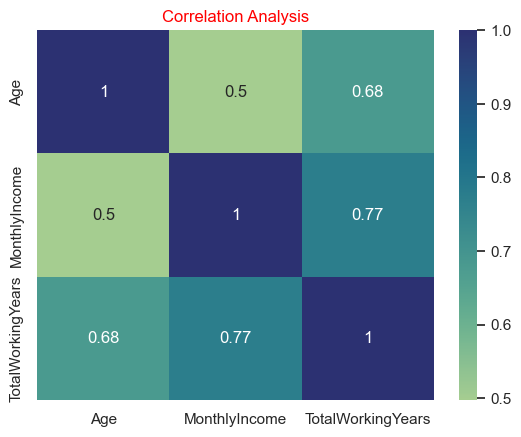

In [71]:
Corr_Column = ['Age','MonthlyIncome','TotalWorkingYears']
sns.heatmap(Hr[Corr_Column].corr(),annot=True, cmap="crest")
plt.title("Correlation Analysis", color ="Red")
plt.show()

## Insights
The correlation analysis reveals a moderate to strong positive relationship among age, monthly income, and total working years.

- Age and Monthly Income show a moderate positive correlation (~0.50), indicating that employee income generally increases as age increases.
- Age and Total Working Years have a strong positive correlation (~0.68), reflecting natural career progression as employees gain experience over time.
- Monthly Income and Total Working Years exhibit the strongest correlation (~0.77), suggesting that work experience is a key driver of salary growth.

**Education Analysis**

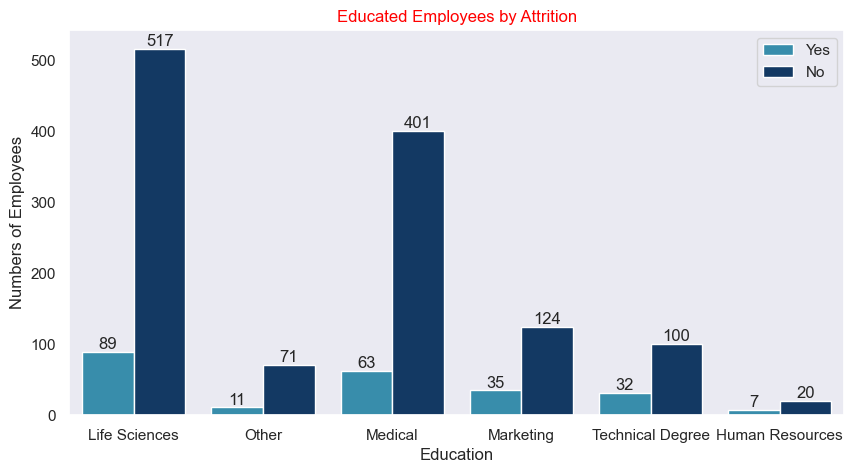

In [12]:
plt.figure(figsize=(10,5))
ax= sns.countplot(x = "EducationField", data= Hr 
,hue="Attrition",palette=["#2596be","#063970"])
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Educated Employees by Attrition",color = "Red")
plt.xlabel("Education")
plt.ylabel("Numbers of Employees")
plt.legend()
plt.show()

## Insight
- The analysis shows that employees from Life Sciences and Medical backgrounds constitute the largest portion of the workforce and therefore record the highest number of attrition cases in absolute terms. However, their attrition remains proportionate to their overall employee count, indicating no unusually high attrition risk in these fields.
- Employees with Marketing and Technical Degree backgrounds display a relatively higher attrition compared to their group size, suggesting greater job mobility or stronger external market opportunities.
- In contrast, employees from Human Resources and ‘Other’ education fields exhibit lower attrition levels, reflecting stronger retention or limited role-switching opportunities.

**Gender Analysis**

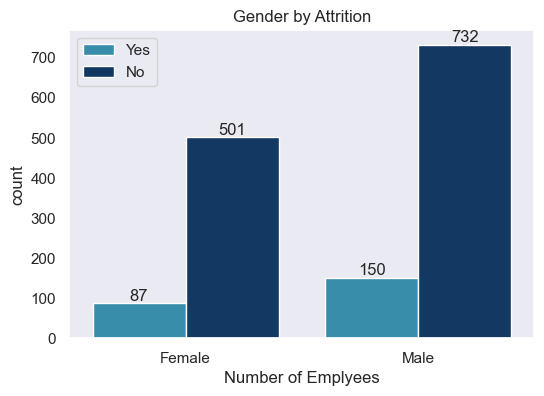

In [13]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "Gender", data=Hr,
 hue="Attrition",palette=["#2596be","#063970"])
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Gender by Attrition")
plt.xlabel("Number of Emplyees")
plt.legend()
plt.show()

## Insights
- The analysis shows that male employees have a higher number of attrition cases compared to female employees. However, this difference is largely influenced by the fact that the overall male workforce is larger than the female workforce.
- When comparing attrition within each gender group, both male and female employees show similar retention patterns, indicating that gender alone is not a strong driver of attrition in this dataset.

**Job Role Analysis**

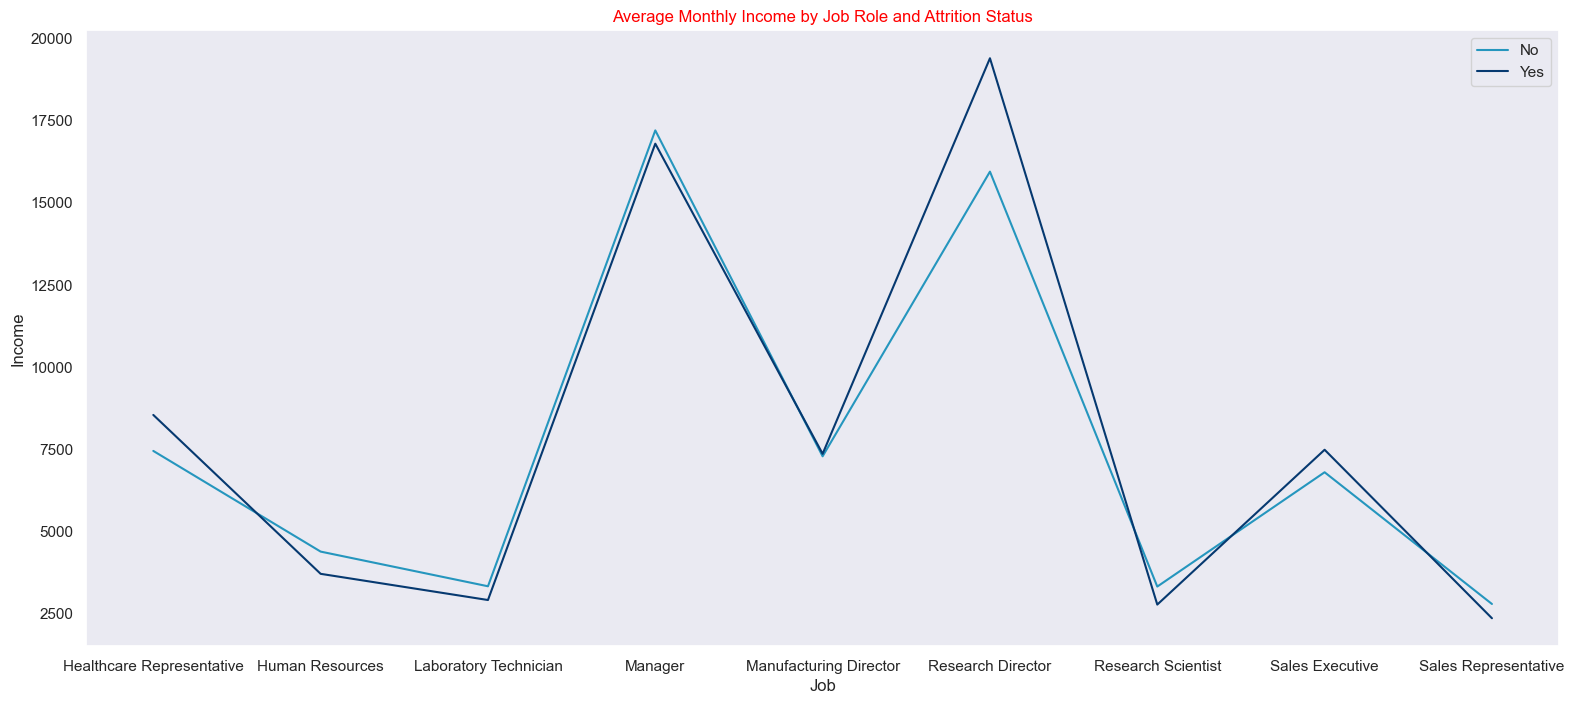

In [14]:
Job_Role = Hr.groupby(["JobRole","Attrition"])["MonthlyIncome"].mean().reset_index()
plt.figure(figsize=(19,8))
sns.lineplot(x = "JobRole", y = "MonthlyIncome", 
hue="Attrition",data=Job_Role,palette=["#2596be","#063970"])
plt.title("Average Monthly Income by Job Role and Attrition Status", color = "Red")
plt.legend()
plt.ylabel("Income")
plt.xlabel("Job")
plt.show()

## Insights
- The analysis reveals clear differences in average monthly income between employees who left and those who stayed across job roles. In several roles—such as Laboratory Technician, Human Resources, Research Scientist, and Sales Representative—employees who left the organization tend to have lower average income compared to retained employees, suggesting that compensation may be a contributing factor to attrition in these roles.
- For senior and high-paying roles like Manager and Research Director, the income gap between attrition and retention is minimal, and overall attrition is lower, indicating greater job stability and satisfaction at higher compensation levels.
- In roles such as Sales Executive, the income difference between leavers and stayers is relatively small, implying that factors beyond salary (e.g., performance pressure or incentives) may influence attrition.

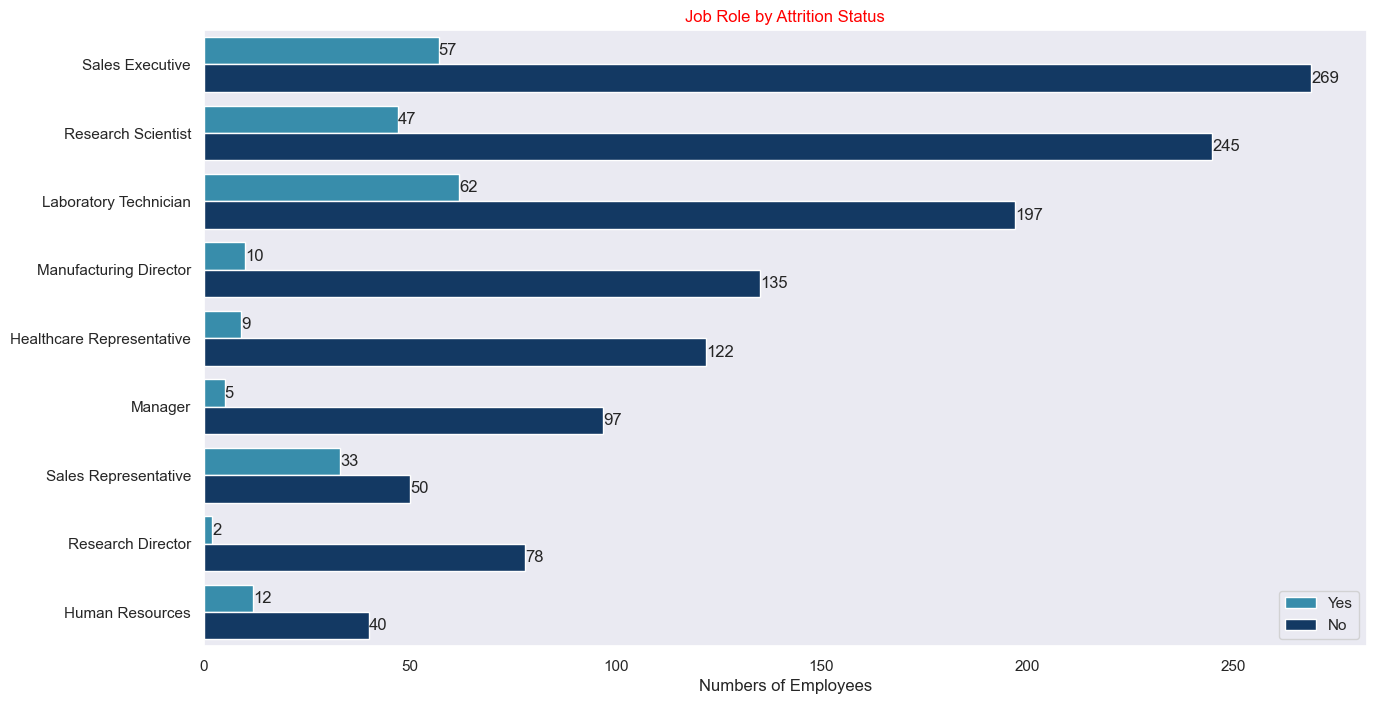

In [50]:
plt.figure(figsize=(15,8))
ax = sns.countplot(y = "JobRole",hue="Attrition",
data=Hr,palette=["#2596be","#063970"])
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Job Role by Attrition Status", color = "Red")
plt.legend()
plt.xlabel("Numbers of Employees")
plt.ylabel("")
plt.show()

## Insights
- The analysis shows that attrition is not evenly distributed across job roles.
Roles such as Laboratory Technician, Sales Executive, and Research Scientist record the highest number of employees leaving, primarily because these roles also have a larger workforce size.
- In contrast, senior and specialized roles like Manager, Manufacturing Director, and Research Director exhibit significantly lower attrition counts, indicating stronger job stability, higher satisfaction, or better compensation and growth opportunities.
- Roles such as Human Resources and Sales Representative show moderate attrition, suggesting that while employees do leave, attrition is relatively controlled compared to operational and sales-heavy roles.

**MaritalStatus Analysis**

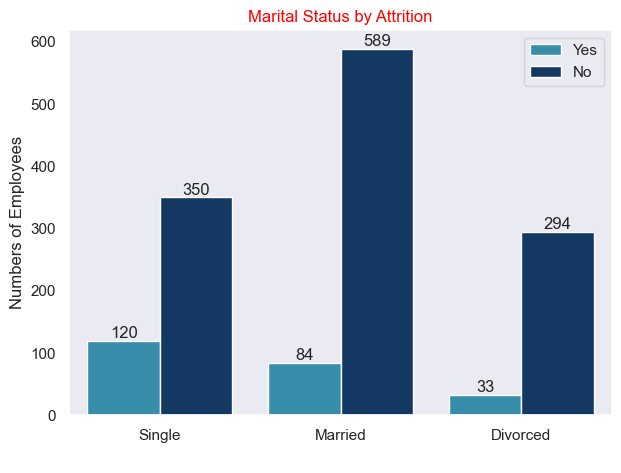

In [47]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = 'MaritalStatus',data= Hr, 
hue= "Attrition",palette=["#2596be","#063970"])
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Marital Status by Attrition",color = "Red")
plt.xlabel(" ")
plt.ylabel("Numbers of Employees")
plt.legend()
plt.show()

## Insights
- The analysis indicates that single employees experience the highest attrition compared to married and divorced employees. Despite married employees forming the largest portion of the workforce, their attrition count is relatively lower, suggesting stronger retention and stability among married employees.
- Divorced employees show the lowest attrition, indicating comparatively higher job continuity within this group.

**Over Time Analysis**

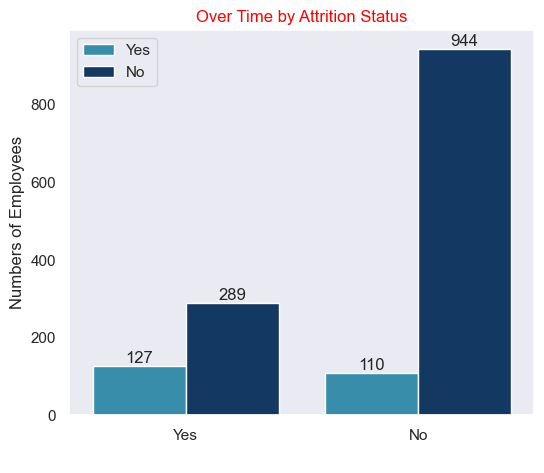

In [48]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x = 'OverTime',data= Hr, 
hue= "Attrition",palette=["#2596be","#063970"])
plt.title("Over Time by Attrition Status",color = "Red")
for bar in ax.containers:
    ax.bar_label(bar)
plt.xlabel(" ")
plt.ylabel("Numbers of Employees")
plt.legend()
plt.show()

## Insights 
- The analysis clearly shows that employees who work overtime have significantly higher attrition compared to those who do not work overtime. A noticeably larger proportion of employees who left the organization belong to the overtime = Yes category.
- In contrast, employees who do not work overtime demonstrate much stronger retention, with a substantially higher number remaining in the organization.

**Department Analysis**

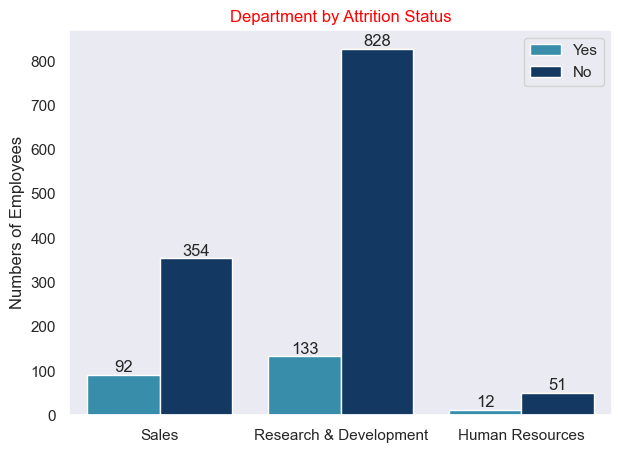

In [49]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = 'Department',data= Hr, 
hue= "Attrition",palette=["#2596be","#063970"])
plt.title("Department by Attrition Status",color = "Red")
for bar in ax.containers:
    ax.bar_label(bar)
plt.xlabel(" ")
plt.ylabel("Numbers of Employees")
plt.legend()
plt.show()

## Insights
- The analysis shows that Research & Development (R&D) experiences the highest number of attrition cases, largely due to it being the largest department in terms of workforce size. Sales also shows a notable level of attrition, indicating comparatively higher employee movement in revenue-facing roles.
- In contrast, the Human Resources department records the lowest attrition, suggesting stronger employee stability or fewer external job-switching opportunities.